In [136]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default="plotly_white"
import seaborn as sns

In [6]:
df=pd.read_csv("/Users/niranjankalaiselvan/Downloads/rfm_data.csv",parse_dates=["PurchaseDate"])
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [10]:
df.dtypes

CustomerID                     int64
PurchaseDate          datetime64[ns]
TransactionAmount            float64
ProductInformation            object
OrderID                        int64
Location                      object
dtype: object

In [14]:
from datetime import datetime as dt

In [32]:
df["recency"]=(dt.now().date()- df["PurchaseDate"].dt.date).dt.days

In [36]:
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,recency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,866
1,2188,2023-04-11,463.70,Product A,176819,London,866
2,4608,2023-04-11,80.28,Product A,340062,New York,866
3,2559,2023-04-11,221.29,Product A,239145,London,866
4,9482,2023-04-11,739.56,Product A,194545,Paris,866


In [56]:
frequency_data=df.groupby("CustomerID").agg(frequency=("OrderID","count")).reset_index()

In [60]:
frequency_data.head()

,CustomerID,frequency
0,1011,2
1,1025,1
2,1029,1
3,1046,1
4,1049,1


In [68]:
df1=df.merge(frequency_data,on="CustomerID",how="left")


In [70]:
monetary_value=df1.groupby("CustomerID").agg(monetary=("TransactionAmount","sum")).reset_index()

In [76]:
monetary_value.head()

,CustomerID,monetary
0,1011,1129.02
1,1025,359.29
2,1029,704.99
3,1046,859.82
4,1049,225.72


In [78]:
df2=df1.merge(monetary_value,on="CustomerID",how="left")
df2.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,recency,frequency,monetary
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,866,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,866,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,866,1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,866,1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,866,1,739.56


In [91]:
recency_scores=[5,4,3,2,1]
frequency_scores=[1,2,3,4,5]
monetary_scores=[1,2,3,4,5]
df2["recency_scores"]=pd.cut(df2["recency"],bins=5,labels=recency_scores).astype(int)
df2["frequency_scores"]=pd.cut(df2["frequency"],bins=5,labels=frequency_scores).astype(int)
df2["monetary_scores"]=pd.cut(df2["monetary"],bins=5,labels=monetary_scores).astype(int)
df2.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,recency,frequency,monetary,recency_scores,frequency_scores,monetary_scores
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,866,1,943.31,1,1,2
1,2188,2023-04-11,463.70,Product A,176819,London,866,1,463.70,1,1,1
2,4608,2023-04-11,80.28,Product A,340062,New York,866,1,80.28,1,1,1
3,2559,2023-04-11,221.29,Product A,239145,London,866,1,221.29,1,1,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,866,1,739.56,1,1,2


In [93]:
df2.dtypes

CustomerID                     int64
PurchaseDate          datetime64[ns]
TransactionAmount            float64
ProductInformation            object
OrderID                        int64
Location                      object
recency                        int64
frequency                      int64
monetary                     float64
recency_scores                 int64
frequency_scores               int64
monetary_scores                int64
dtype: object

In [97]:
df2["RFM_score"]=df2["recency_scores"]+df2["frequency_scores"]+df2["monetary_scores"]
segment=["Low","Medium","High"]

In [194]:
df2["Segment"]=pd.qcut(df2["RFM_score"],q=3,labels=segment)
df2.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,recency,frequency,monetary,recency_scores,frequency_scores,monetary_scores,RFM_score,Segment
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,866,1,943.31,1,1,2,4,Low
1,2188,2023-04-11,463.70,Product A,176819,London,866,1,463.70,1,1,1,3,Low
2,4608,2023-04-11,80.28,Product A,340062,New York,866,1,80.28,1,1,1,3,Low
3,2559,2023-04-11,221.29,Product A,239145,London,866,1,221.29,1,1,1,3,Low
4,9482,2023-04-11,739.56,Product A,194545,Paris,866,1,739.56,1,1,2,4,Low


In [242]:
segment_count=df2["Segment"].value_counts().reset_index()
segemnt_count

,Segment,Count
0,Low,821
1,Medium,172
2,High,7


In [217]:
segment_count
segment_count.columns=["Segment","Count"]

In [219]:
pastel_colours=px.colors.qualitative.Pastel

In [221]:
bar_figure=px.bar(data_frame=segment_count,x="Segment",y="Count",color="Segment",color_discrete_sequence=pastel_colours,title="RFM Value Segment distribution")

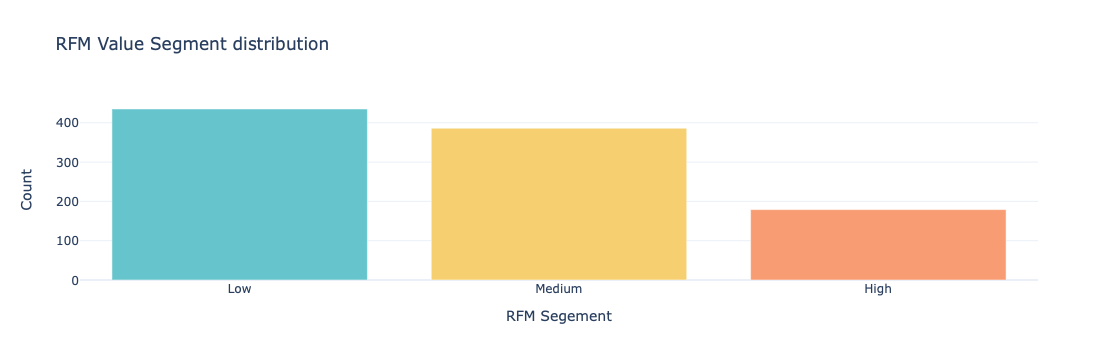

In [223]:
bar_figure.update_layout(xaxis_title="RFM Segement",yaxis_title="Count",showlegend=False)

In [270]:
df2["RFM_Segment"]=""
df2.loc[df2["RFM_score"]>=9,"RFM_Segment"]="Champions"
df2.loc[(df2["RFM_score"]>=6) & (df2["RFM_score"]< 9) ,"RFM_Segment"]="Potential loyalists"
df2.loc[(df2["RFM_score"]>=5) & (df2["RFM_score"]< 6) ,"RFM_Segment"]="At risk Customers"
df2.loc[(df2["RFM_score"]>=4) & (df2["RFM_score"]< 5) ,"RFM_Segment"]="Can't Lose"
df2.loc[(df2["RFM_score"]>=3) & (df2["RFM_score"]< 4) ,"RFM_Segment"]="Lost"

In [274]:
df2.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,recency,frequency,monetary,recency_scores,frequency_scores,monetary_scores,RFM_score,Segment,RFM_Segment
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,866,1,943.31,1,1,2,4,Low,Can't Lose
1,2188,2023-04-11,463.70,Product A,176819,London,866,1,463.70,1,1,1,3,Low,Lost
2,4608,2023-04-11,80.28,Product A,340062,New York,866,1,80.28,1,1,1,3,Low,Lost
3,2559,2023-04-11,221.29,Product A,239145,London,866,1,221.29,1,1,1,3,Low,Lost
4,9482,2023-04-11,739.56,Product A,194545,Paris,866,1,739.56,1,1,2,4,Low,Can't Lose


In [276]:
segment_product_counts=df2.groupby(["Segment","RFM_Segment"]).agg(Count=("CustomerID","count"))

In [278]:
segment_product_counts

Count
Segment RFM_Segment               
Low     At risk Customers      180
        Can't Lose             173
        Champions                0
        Lost                    82
        Potential loyalists      0
Medium  At risk Customers        0
        Can't Lose               0
        Champions                0
        Lost                     0
        Potential loyalists    386
High    At risk Customers        0
        Can't Lose               0
        Champions               62
        Lost                     0
        Potential loyalists    117

In [292]:
segment_product_counts=segment_product_counts.sort_values("Count",ascending=False).reset_index()

In [294]:
segment_product_counts

,Segment,RFM_Segment,Count
0,Medium,Potential loyalists,386
1,Low,At risk Customers,180
2,Low,Can't Lose,173
3,High,Potential loyalists,117
4,Low,Lost,82
5,High,Champions,62
6,Low,Champions,0
7,Low,Potential loyalists,0
8,Medium,At risk Customers,0
9,Medium,Can't Lose,0


In [298]:
fig_tree_map=px.treemap(data_frame=segment_product_counts,path=["Segment","RFM_Segment"],values="Count",color="Segment",
                        color_discrete_sequence=pastel_colours,title="RFM of customer segments by Value")

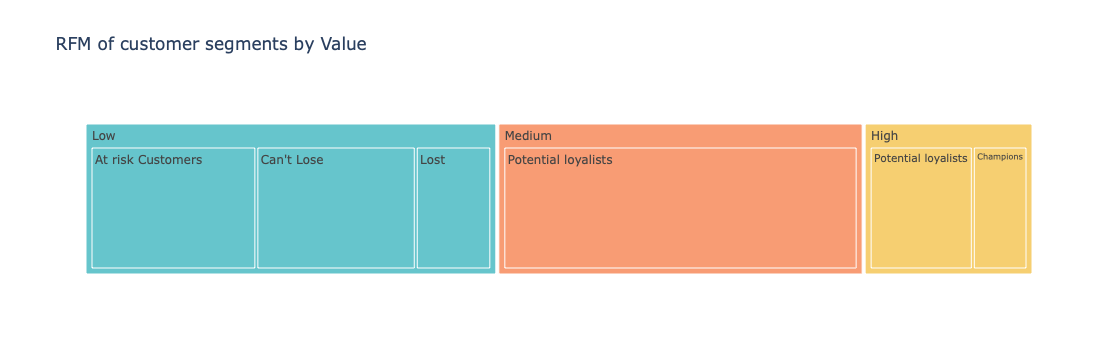

In [300]:
fig_tree_map.show()

In [306]:
Champions_segment=df2[df2["RFM_Segment"]=="Champions"]
Champions_segment.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,recency,frequency,monetary,recency_scores,frequency_scores,monetary_scores,RFM_score,Segment,RFM_Segment
63,5557,2023-04-14,511.86,Product D,522866,London,863,3,2379.45,1,5,5,11,High,Champions
180,5557,2023-04-22,996.98,Product D,765620,Tokyo,855,3,2379.45,1,5,5,11,High,Champions
220,3938,2023-04-25,806.29,Product A,520400,New York,852,2,1731.53,2,3,4,9,High,Champions
235,4804,2023-04-25,690.50,Product C,183336,Tokyo,852,3,2073.33,2,5,5,12,High,Champions
249,7363,2023-04-26,262.45,Product C,778120,New York,851,3,1386.32,2,5,3,10,High,Champions


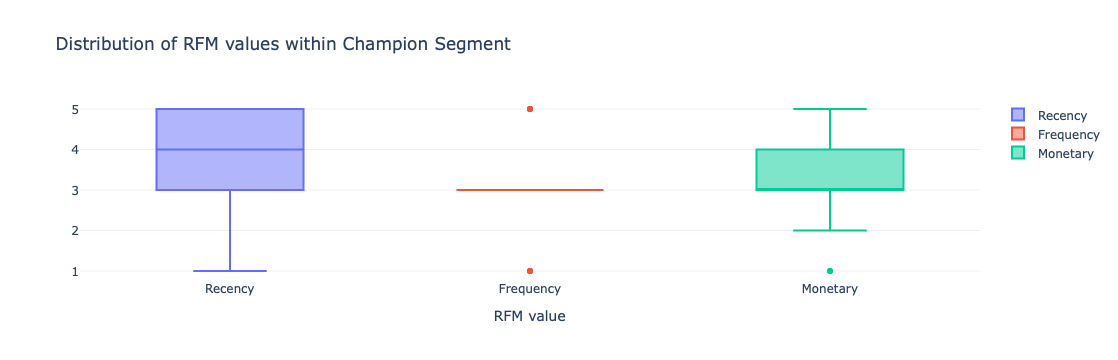

In [330]:
fig=go.Figure()
fig.add_trace(go.Box(y=Champions_segment["recency_scores"],name="Recency"))
fig.add_trace(go.Box(y=Champions_segment["frequency_scores"],name="Frequency"))
fig.add_trace(go.Box(y=Champions_segment["monetary_scores"],name="Monetary"))
fig.update_layout(xaxis_title="RFM value",title="Distribution of RFM values within Champion Segment")

In [332]:
correlation_matrix=Champions_segment[["recency_scores","frequency_scores","monetary_scores"]].corr()

In [334]:
correlation_matrix

,recency_scores,frequency_scores,monetary_scores
recency_scores,1.000000,-0.571727,-0.474715
frequency_scores,-0.571727,1.000000,0.390657
monetary_scores,-0.474715,0.390657,1.000000


In [362]:
fig_heatmeap=go.Figure(go.Heatmap(z=correlation_matrix.values,x=correlation_matrix.columns,y=correlation_matrix.columns,colorscale="RdBu",colorbar=dict(title="Correlation")))

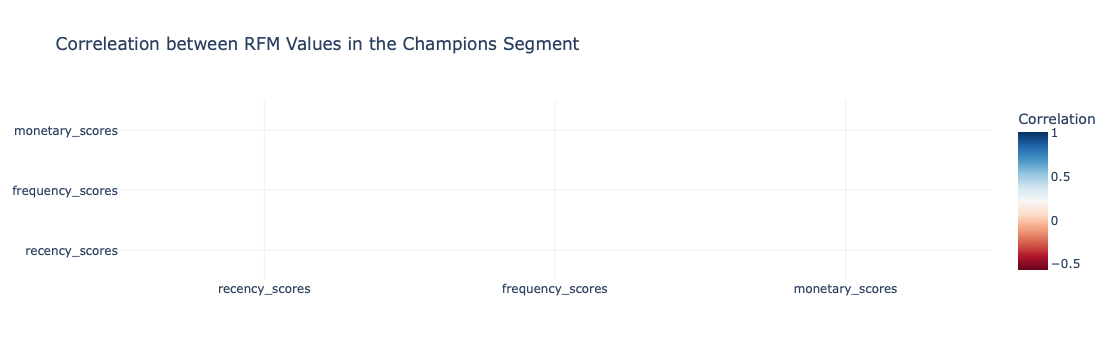

In [366]:
fig_heatmeap.update_layout(title="Correleation between RFM Values in the Champions Segment")
fig_heatmeap.show()

In [370]:
df2.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,recency,frequency,monetary,recency_scores,frequency_scores,monetary_scores,RFM_score,Segment,RFM_Segment
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,866,1,943.31,1,1,2,4,Low,Can't Lose
1,2188,2023-04-11,463.70,Product A,176819,London,866,1,463.70,1,1,1,3,Low,Lost
2,4608,2023-04-11,80.28,Product A,340062,New York,866,1,80.28,1,1,1,3,Low,Lost
3,2559,2023-04-11,221.29,Product A,239145,London,866,1,221.29,1,1,1,3,Low,Lost
4,9482,2023-04-11,739.56,Product A,194545,Paris,866,1,739.56,1,1,2,4,Low,Can't Lose


In [376]:
segment_count_df=df2["RFM_Segment"].value_counts().reset_index()

In [390]:
segment_count_df.columns=["Segment","Count"]
segment_count_df.head()


,Segment,Count
0,Potential loyalists,503
1,At risk Customers,180
2,Can't Lose,173
3,Lost,82
4,Champions,62


In [392]:
champions_colour='rgb(158, 202, 225)'

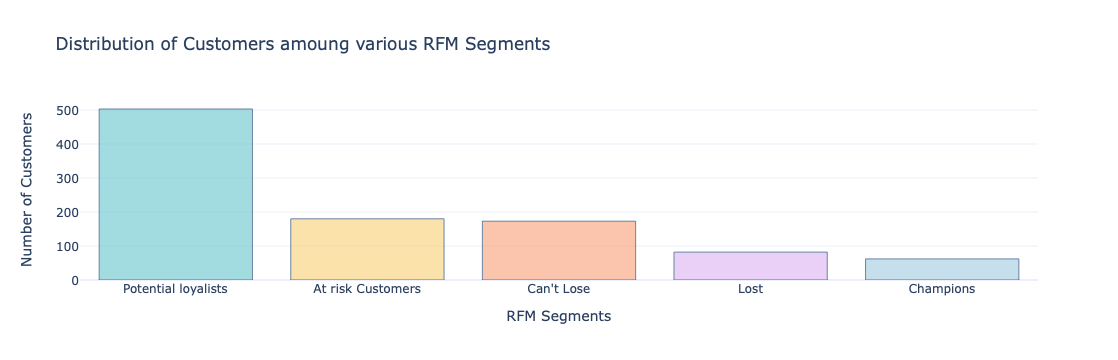

In [450]:
fig=go.Figure()
fig.add_traces(go.Bar(x=segment_count_df.Segment,y=segment_count_df.Count))
fig.update_traces(marker_color=[champions_colour if segment=="Champions" else pastel_colours[i]
                                for i,segment in enumerate(segment_count_df["Segment"])],marker_line_color='rgb(8,48,107)',marker_line_width=1,opacity=0.6)
fig.update_layout(xaxis_title="RFM Segments",yaxis_title="Number of Customers",title="Distribution of Customers amoung various RFM Segments")

In [404]:
segment_count_df.index

RangeIndex(start=0, stop=5, step=1)

In [424]:
import numpy as np 
a=np.arange(1,6)

In [456]:
segement_scores=df2.groupby("RFM_Segment")[["recency_scores","frequency_scores","monetary_scores"]].agg("mean").reset_index()

In [458]:
segement_scores

,RFM_Segment,recency_scores,frequency_scores,monetary_scores
0,At risk Customers,2.344444,1.011111,1.644444
1,Can't Lose,1.537572,1.000000,1.462428
2,Champions,3.806452,3.064516,3.225806
3,Lost,1.000000,1.000000,1.000000
4,Potential loyalists,3.918489,1.194831,1.741551


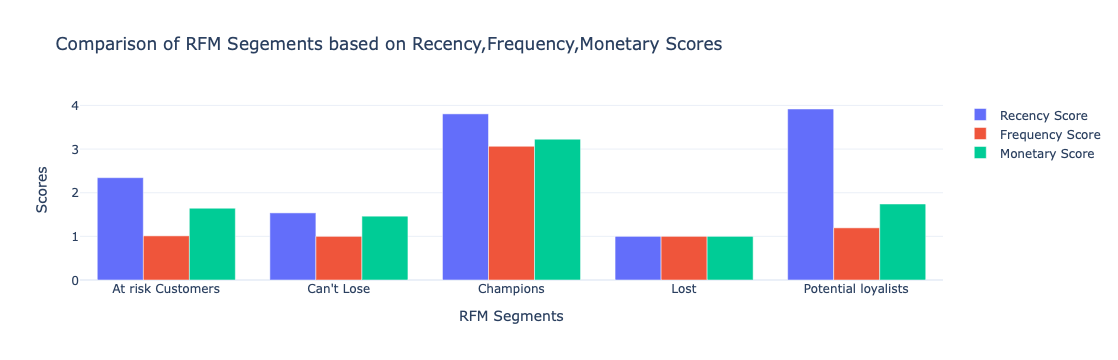

In [473]:
fig=go.Figure()
fig.add_traces(go.Bar(x=segement_scores.RFM_Segment,y=segement_scores.recency_scores,name="Recency Score"))
fig.add_traces(go.Bar(x=segement_scores.RFM_Segment,y=segement_scores.frequency_scores,name="Frequency Score"))
fig.add_traces(go.Bar(x=segement_scores.RFM_Segment,y=segement_scores.monetary_scores,name="Monetary Score"))
fig.update_layout(xaxis_title="RFM Segments",yaxis_title="Scores",
                  title="Comparison of RFM Segements based on Recency,Frequency,Monetary Scores")